In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Text Mining

Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [2]:
#Texto de Edgar Allan Poe - the black cat

text = ["From my infancy I was noted for the docility and humanity of my disposition.",
      "My tenderness of heart was even so conspicuous as to make me the jest of my companions.",
      "There is something in the unselfish and self-sacrificing love of a brute, which goes directly \
        to the heart of him who has had frequent occasion to test the paltry friendship and gossamer fidelity of mere Man."]

text

['From my infancy I was noted for the docility and humanity of my disposition.',
 'My tenderness of heart was even so conspicuous as to make me the jest of my companions.',
 'There is something in the unselfish and self-sacrificing love of a brute, which goes directly         to the heart of him who has had frequent occasion to test the paltry friendship and gossamer fidelity of mere Man.']

In [3]:
# Conta quantas vezes a palavra aparece em cada linha do texto
count_vectorizer = CountVectorizer(stop_words='english') # retira as stop words do texto
matrix = count_vectorizer.fit_transform(text) #cria matriz conta palavras

In [4]:
tf_idf_array = matrix.toarray() # transforma a matriz em um array

words_set = count_vectorizer.get_feature_names_out()
df_tf_idf = pd.DataFrame(tf_idf_array, columns = words_set).T

In [5]:
# cria uma coluna contando o total de vezes que a palavra aparece
df_tf_idf['Count'] = df_tf_idf.sum(axis=1) 
df_tf_idf = df_tf_idf.sort_values('Count', ascending=False)
df_tf_idf

,0,1,2,Count
heart,0,1,1,2
brute,0,0,1,1
jest,0,1,0,1
test,0,0,1,1
tenderness,0,1,0,1
self,0,0,1,1
sacrificing,0,0,1,1
paltry,0,0,1,1
occasion,0,0,1,1
noted,1,0,0,1


A palavra que mais aparece no trecho é 'HEART'

<BarContainer object of 27 artists>

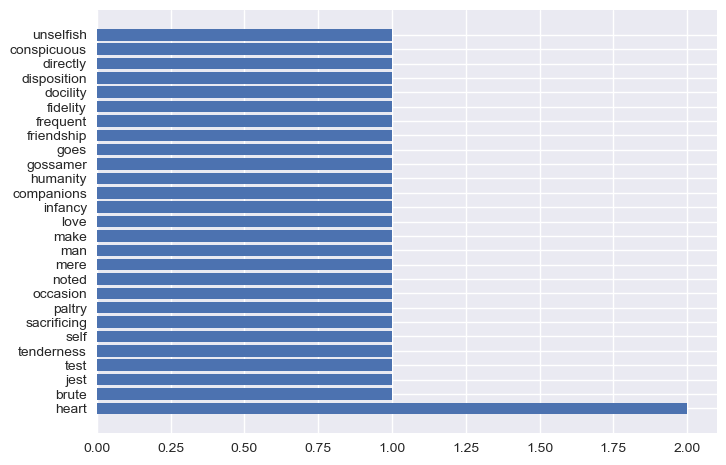

In [6]:
plt.style.use('seaborn')

plt.barh(df_tf_idf.index, df_tf_idf.Count)